# CNC Mill Tool Wear
- https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill
- Predict "Machining_Process"

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
import os
path_parent = os.path.dirname(os.getcwd())
saveFolder = os.path.join(path_parent, 'Topic 02 - Classification', 'Data_CNC_Processed')
print(saveFolder)
#saveFolder = '..\Topic 02 - Classification\Data_CNC_Processed'
filename = 'pred_machining_process'
compression = 'gzip'
df = pd.read_pickle(f'{saveFolder}/{filename}.pkl',compression=compression)
df.head(3)

d:\Work\Coding\Class\ai-class-2564-1\Topic 02 - Classification\Data_CNC_Processed


X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   

   ...  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0  ...             329.0               0.0    6.960000e-07              12.0   
1  ...             328.0               0.0   -5.270000e-07              12.0   
2  ...             328.0               0.0    9.100000e-07              12.0   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 0.0                 50.0   
1                        1.0                 4.0                 50.0   
2                        1.0                 7.0                 50.0   

   Machining_Process  feedrate  clamp_pressure  
0                  7         6             4.0  
1                  7         6             4.0  
2                  7         6             4.0  

[3 rows x 50 columns]

In [3]:
max_features = 20

# Transform X with variance selector

In [4]:
from sklearn.feature_selection import VarianceThreshold

colsX = np.array([item for item in df.columns if item not in 'Machining_Process'])
X = df[colsX].values
y = df['Machining_Process'].values

# Creating object
sel = VarianceThreshold(threshold=0)

# Fitting
sel.fit(X)

# Boolean
sup = sel.get_support()
cols_sel = colsX[sup]
print(f'Chosen columns:')
print('-'*30)
print(*cols_sel, sep=', ')

cols_rem = colsX[np.logical_not(sup)]
print(f'\nRemoved columns:')
print('-'*30)
print(*cols_rem, sep=', ')

X = sel.transform(X)
dfX = pd.DataFrame(data=X, columns=cols_sel)
dfX.head()

# Initialize dictionary to store selector
sel = {}

Chosen columns:
------------------------------
X1_ActualPosition, X1_ActualVelocity, X1_ActualAcceleration, X1_CommandPosition, X1_CommandVelocity, X1_CommandAcceleration, X1_CurrentFeedback, X1_DCBusVoltage, X1_OutputCurrent, X1_OutputVoltage, X1_OutputPower, Y1_ActualPosition, Y1_ActualVelocity, Y1_ActualAcceleration, Y1_CommandPosition, Y1_CommandVelocity, Y1_CommandAcceleration, Y1_CurrentFeedback, Y1_DCBusVoltage, Y1_OutputCurrent, Y1_OutputVoltage, Y1_OutputPower, Z1_ActualPosition, Z1_ActualVelocity, Z1_ActualAcceleration, Z1_CommandPosition, Z1_CommandVelocity, Z1_CommandAcceleration, S1_ActualPosition, S1_ActualVelocity, S1_ActualAcceleration, S1_CommandPosition, S1_CommandVelocity, S1_CommandAcceleration, S1_CurrentFeedback, S1_DCBusVoltage, S1_OutputCurrent, S1_OutputVoltage, S1_OutputPower, M1_CURRENT_PROGRAM_NUMBER, M1_sequence_number, M1_CURRENT_FEEDRATE, feedrate, clamp_pressure

Removed columns:
------------------------------
Z1_CurrentFeedback, Z1_DCBusVoltage, Z1_Outp

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


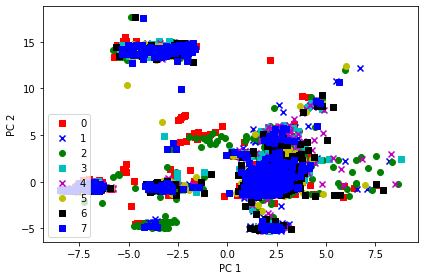

In [11]:
X_std = StandardScaler().fit_transform(X)
X_std_pca = PCA(n_components=2).fit_transform(X_std)

colors = ["r", "b", "g", "c", "m", "y", "k", "b"]
markers = ["s", "x", "o", "s", "x", "o","s", "s"]
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_pca[y == l, 0], X_std_pca[y == l, 1], c=c, label=l, marker=m)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [16]:
X_std_lda = LDA(n_components=2).fit_transform(X_std, y)

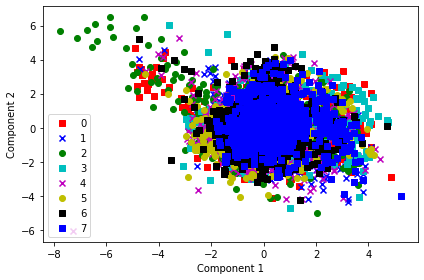

In [18]:
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_lda[y == l, 0], X_std_lda[y == l, 1], c=c, label=l, marker=m)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [27]:

sel['pca-2'] = PCA(n_components=2)
sel['pca-10'] = PCA(n_components=10)
sel['pca-25'] = PCA(n_components=25)
sel['lda'] = LDA(n_components=7)

## Training with random forrest

In [19]:
from sklearn.ensemble import RandomForestClassifier

paramSetAll = {
    "ex1": {
        "criterion": "gini",
        "n_estimators": 25,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
    "ex2": {
        "criterion": "gini",
        "n_estimators": 50,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
    "ex3": {
        "criterion": "gini",
        "n_estimators": 100,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
}

In [20]:
cl = list(range(1,4))
ca = [ f'ex{i}' for i in cl]
paramSet = { k: paramSetAll[k] for k in ca} 
print(paramSet)

{'ex1': {'criterion': 'gini', 'n_estimators': 25, 'max_samples': None, 'max_features': 'auto', 'max_depth': None}, 'ex2': {'criterion': 'gini', 'n_estimators': 50, 'max_samples': None, 'max_features': 'auto', 'max_depth': None}, 'ex3': {'criterion': 'gini', 'n_estimators': 100, 'max_samples': None, 'max_features': 'auto', 'max_depth': None}}


In [42]:
from sklearn.linear_model import LogisticRegression

def training(X_train, y_train, X_test, y_test):

    clf = LogisticRegression()

    # Training
    clf.fit(X_train, y_train)

    # Prediction
    y_pred = clf.predict(X_test)

    # Misclassification from the test samples
    sumMiss = (y_test != y_pred).sum()

    # Accuracy score from the test samples
    accuracyScore = accuracy_score(y_test, y_pred)

    print(f"Misclassified examples: {sumMiss}")
    print(f"Accuracy score: {accuracyScore}")
    print(f"--------------------------------------------------")

In [43]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.shape)

(17700, 44)


In [44]:
# No transformation
training(X_train_std, y_train, X_test_std, y_test)

Misclassified examples: 6105
Accuracy score: 0.19522805167413657
--------------------------------------------------


C:\Users\nnnpo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
X_train_std_trans = sel['pca-2'].fit_transform(X_train_std)
X_test_std_trans = sel['pca-2'].transform(X_test_std)

training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Misclassified examples: 6336
Accuracy score: 0.16477722119694174
--------------------------------------------------


In [46]:
X_train_std_trans = sel['pca-10'].fit_transform(X_train_std)
X_test_std_trans = sel['pca-10'].transform(X_test_std)

training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Misclassified examples: 6349
Accuracy score: 0.16306353809649354
--------------------------------------------------


In [47]:
X_train_std_trans = sel['pca-25'].fit_transform(X_train_std)
X_test_std_trans = sel['pca-25'].transform(X_test_std)

training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Misclassified examples: 6091
Accuracy score: 0.19707355655154232
--------------------------------------------------


In [48]:
sel['pca'] = PCA(n_components=25)
X_train_std_trans = sel['pca'].fit_transform(X_train_std)
X_test_std_trans = sel['pca'].transform(X_test_std)

training(X_train_std_trans, y_train, X_test_std_trans, y_test)

Misclassified examples: 6091
Accuracy score: 0.19707355655154232
--------------------------------------------------


In [49]:
sel['lda'] = LDA(n_components=7)
X_train_std_trans = sel['lda'].fit_transform(X_train_std, y_train)
X_test_std_trans = sel['lda'].transform(X_test_std)

print(X_train_std_trans.shape)
training(X_train_std_trans, y_train, X_test_std_trans, y_test)

(17700, 7)
Misclassified examples: 6096
Accuracy score: 0.19641444766675456
--------------------------------------------------
